In [123]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json
import os

In [124]:
# Read master postcodes list and postcodes lat/long csv
path = "Output/master_data.csv"
df = pd.read_csv(path)

#path2 = "Output/postcode_df.csv"
#postcodes = pd.read_csv(path2)

In [134]:
filtered_df = df.loc[(df["Total People"] > 10000), :]
filtered_df

,Postcode,House,Semi-detached,Apartment,Other dwelling,"No bedrooms (studios, etc)",1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,...,One parent with children,Other family,Sole person household,Group household,Sum of Dwelling Types,Sum of Bedrooms,Sum of House Composition,People with Mental Health Conditions,Total People,State
1,810,14828,2642,5649,85,207,1768,8552,9360,5484,...,2893,425,6996,1737,23204,26942,27060,1971,34330,7: Northern Territory
2,812,9601,1127,1549,134,67,448,3389,6590,2353,...,2032,204,3249,592,12411,13485,13596,1076,18634,7: Northern Territory
3,820,4926,3337,6733,104,167,1463,7566,7580,2372,...,1644,220,5987,1843,15100,19908,20021,1112,19920,7: Northern Territory
4,822,9415,655,168,348,216,873,3083,4392,1811,...,1989,404,1921,268,10586,10902,11003,755,25304,7: Northern Territory
7,830,9542,905,1888,16,25,805,2765,6391,2944,...,2193,157,3537,566,12351,13456,13651,1302,18501,7: Northern Territory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,7250,33651,3152,4202,142,116,2567,10629,19927,8506,...,5302,400,14883,1537,41147,43837,44558,5821,51133,6: Tasmania
2626,7307,8732,485,64,96,36,317,2029,5101,1720,...,928,93,2762,196,9377,9498,9622,1153,11849,6: Tasmania
2627,7310,20651,2473,52,208,87,1244,5300,12894,3844,...,3261,245,8145,755,23384,24257,24522,3536,28635,6: Tasmania
2628,7315,11357,1178,47,203,31,725,2753,6894,2374,...,1592,117,4439,238,12785,13162,13443,1658,15635,6: Tasmania


In [136]:
filtered_df["Mental Health (%)"] = round(filtered_df["People with Mental Health Conditions"] / filtered_df["Total People"] * 100, 1)
filtered_df

/Users/matthewford/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Postcode,House,Semi-detached,Apartment,Other dwelling,"No bedrooms (studios, etc)",1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,...,Other family,Sole person household,Group household,Sum of Dwelling Types,Sum of Bedrooms,Sum of House Composition,People with Mental Health Conditions,Total People,State,Mental Health (%)
1,810,14828,2642,5649,85,207,1768,8552,9360,5484,...,425,6996,1737,23204,26942,27060,1971,34330,7: Northern Territory,5.7
2,812,9601,1127,1549,134,67,448,3389,6590,2353,...,204,3249,592,12411,13485,13596,1076,18634,7: Northern Territory,5.8
3,820,4926,3337,6733,104,167,1463,7566,7580,2372,...,220,5987,1843,15100,19908,20021,1112,19920,7: Northern Territory,5.6
4,822,9415,655,168,348,216,873,3083,4392,1811,...,404,1921,268,10586,10902,11003,755,25304,7: Northern Territory,3.0
7,830,9542,905,1888,16,25,805,2765,6391,2944,...,157,3537,566,12351,13456,13651,1302,18501,7: Northern Territory,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,7250,33651,3152,4202,142,116,2567,10629,19927,8506,...,400,14883,1537,41147,43837,44558,5821,51133,6: Tasmania,11.4
2626,7307,8732,485,64,96,36,317,2029,5101,1720,...,93,2762,196,9377,9498,9622,1153,11849,6: Tasmania,9.7
2627,7310,20651,2473,52,208,87,1244,5300,12894,3844,...,245,8145,755,23384,24257,24522,3536,28635,6: Tasmania,12.3
2628,7315,11357,1178,47,203,31,725,2753,6894,2374,...,117,4439,238,12785,13162,13443,1658,15635,6: Tasmania,10.6


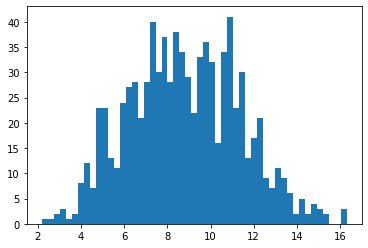

In [141]:
data = filtered_df["Mental Health (%)"]
plt.hist(data, bins=51)
plt.show()



In [143]:
filtered_df["Living Alone (%)"] = round(filtered_df["Sole person household"] / filtered_df["Sum of House Composition"] * 100, 1)


/Users/matthewford/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


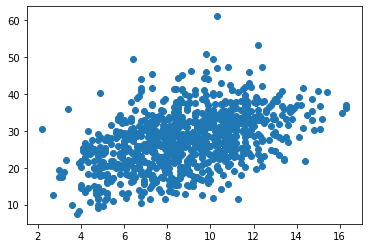

In [144]:
plt.scatter(data,filtered_df["Living Alone (%)"])
plt.show()